In [4]:
pip install seaborn

# 1. Cargar archivos

In [10]:
import pandas as pd
import numpy as np
import os
from google.colab import files, drive
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')

    # Mostrar información inicial
print("\n--- Información Inicial del Dataset ---")
print(f"Películas totales: {len(movies)}")
print(f"Total de ratings: {len(ratings)}")
print(f"Usuarios únicos: {ratings['userId'].nunique()}")


--- Información Inicial del Dataset ---
Películas totales: 27278
Total de ratings: 20000263
Usuarios únicos: 138493


 # 2. Limpiar y procesar datos

    Limpiar nombres de películas
    Separar por Géneros

In [11]:
movies['title_cleaned'] = movies['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
movies['genres_list'] = movies['genres'].str.split('|')

 # 3. Generar estadísticas

In [12]:
ratings_stats = ratings.groupby('movieId').agg({
        'rating': ['count', 'mean', 'std'],
        'userId': 'nunique'
    }).reset_index()

ratings_stats.columns = ['movieId', 'total_ratings', 'avg_rating', 'std_rating', 'total_users']


movies_enriched = movies.merge(ratings_stats, on='movieId', how='left')

# 4. Filtrado y scoring
    Filtrar películas con suficientes ratings (al menos 10)

In [15]:
movies_enriched = movies_enriched[movies_enriched['total_ratings'] >= 10]
print(f"Películas con al menos 10 ratintgs: {len(movies_enriched)}")

Películas con al menos 10 ratintgs: 15451


# Calcular score de popularidad

In [16]:
movies_enriched['popularity_score'] = (
        movies_enriched['total_ratings'] *
        movies_enriched['avg_rating'] /
        movies_enriched['total_ratings'].max()
    )

# 5. Análisis de usuarios

In [17]:
user_activity = ratings.groupby('userId').agg({
        'movieId': 'count',
        'rating': ['mean', 'std']
    }).reset_index()

user_activity.columns = ['userId', 'total_movies_rated', 'avg_user_rating', 'std_user_rating']


# 6. Visualizaciones

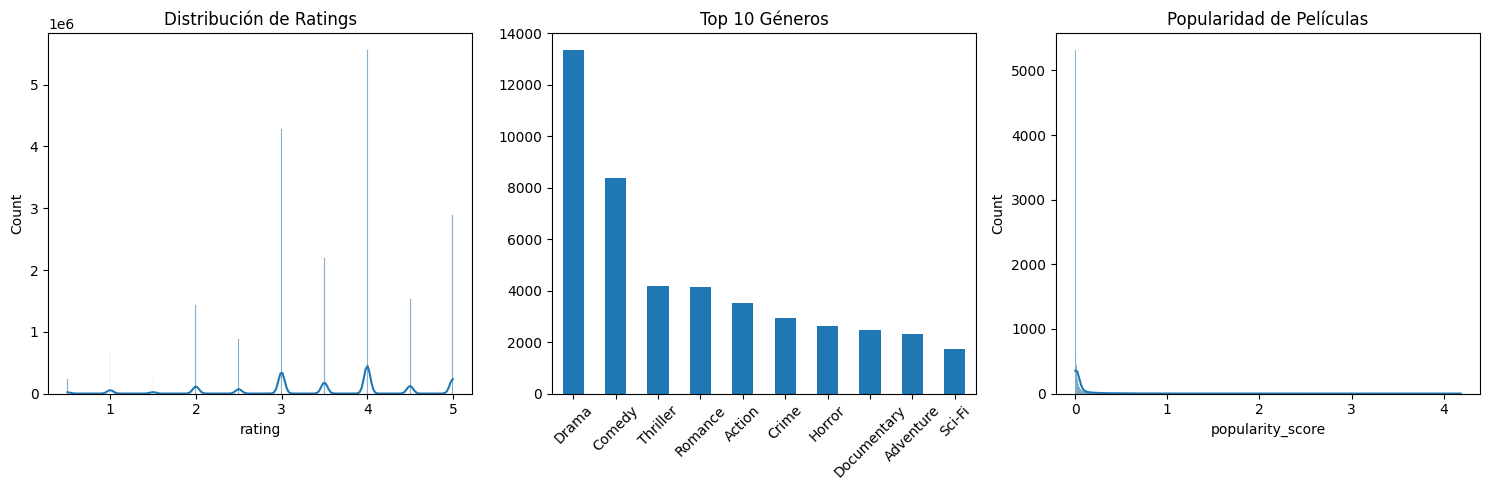

In [19]:
plt.figure(figsize=(15, 5))

# Distribución de ratings
plt.subplot(131)
sns.histplot(ratings['rating'], kde=True)
plt.title('Distribución de Ratings')

# Número de películas por género
plt.subplot(132)
genre_counts = movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Géneros')
plt.xticks(rotation=45)

# Distribución de popularidad de películas

plt.subplot(133)
sns.histplot(movies_enriched['popularity_score'], kde=True)
plt.title('Popularidad de Películas')

plt.tight_layout()
plt.savefig('processed/movielens_analysis.png')

# 7. Guardar datasets procesados

In [ ]:
output_path = 'processed/movielens_processed'
os.makedirs(output_path, exist_ok=True)

movies_enriched.to_csv(os.path.join(output_path, 'movies_processed.csv'), index=False)
ratings.to_csv(os.path.join(output_path, 'ratings_processed.csv'), index=False)
user_activity.to_csv(os.path.join(output_path, 'user_activity.csv'), index=False)

print("\n--- Resumen Final ---")
print(f"Películas después de filtrar: {len(movies_enriched)}")
print(f"Usuarios únicos: {ratings['userId'].nunique()}")

## Dividir datos en conjuntos de entrenamiento y prueba con estratificación

Test Size: 0.2 (20%)
Razones:

Balance Estadístico


80% datos para entrenamiento
20% para evaluación





In [ ]:
# Obtener lista única de usuarios
users = ratings['userId'].unique()
test_size = 0.2
# Mezclar aleatoriamente los usuarios para evitar sesgos
np.random.shuffle(users)

# Calcular índice de split
# Por ejemplo, si test_size=0.2 y hay 1000 usuarios:
# split_index = 1000 * (1 - 0.2) = 800
split_index = int(len(users) * (1 - test_size))

# Dividir usuarios en dos grupos
# Los primeros 800 serán usuarios de entrenamiento
train_users = users[:split_index]
# Los últimos 200 serán usuarios de test
test_users = users[split_index:]

# Filtrar ratings de usuarios de entrenamiento
train_ratings = ratings[ratings['userId'].isin(train_users)]
# Filtrar ratings de usuarios de test
test_ratings = ratings[ratings['userId'].isin(test_users)]

# 5. Guardar splits

In [7]:
train_ratings.to_csv(os.path.join(output_path, 'processed/train_ratings.csv'), index=False)
test_ratings.to_csv(os.path.join(output_path, 'processed/test_ratings.csv'), index=False)

print("Proceso completado. Archivos guardados en Google Drive.")



IndentationError: unexpected indent (<ipython-input-7-af1d348bcad3>, line 13)